In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['trg'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),trg
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df1 = df[df.trg==0]
df2 = df[df.trg==1]
df3 = df[df.trg==2]

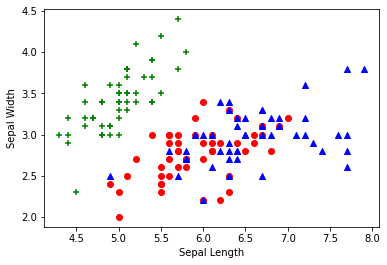

In [7]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="green",marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red",marker='o')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'],color="blue",marker='^')

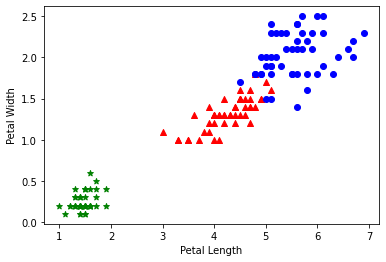

In [8]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="green",marker='*')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='^')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'],color="blue",marker='o')

In [9]:
X = df.drop(['trg'], axis="columns")
y = df.trg

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)

In [12]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [13]:
KNN.score(X_test, y_test)

0.9777777777777777

***Plot Confusion Matrix***
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix C is such that C_{i,j} is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = KNN.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[14,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 16]], dtype=int64)

Text(51.0, 0.5, 'True Data')

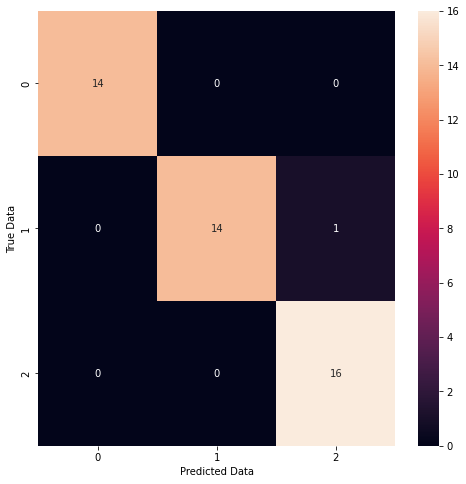

In [15]:
import seaborn as sb
plt.figure(figsize=(8,8))
sb.heatmap(conf, annot=True)
plt.xlabel('Predicted Data')
plt.ylabel('True Data')

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

